In [4]:
import numpy as np
import pandas as pd

In [11]:

df = pd.read_csv('spam.csv', encoding='latin1')

In [12]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2533,ham,Glad it went well :) come over at 11 then we'l...,NaN,NaN,NaN
2773,spam,How come it takes so little time for a child w...,NaN,NaN,NaN
959,ham,Where @,NaN,NaN,NaN
2059,ham,He didn't see his shadow. We get an early spri...,NaN,NaN,NaN
5209,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.sample(5)

,v1,v2
1524,ham,Hi:)cts employee how are you?
261,ham,Anyway i'm going shopping on my own now. Cos m...
4248,ham,Loosu go to hospital. De dont let it careless.
2820,ham,Oh god..taken the teeth?is it paining
4861,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [18]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5031,ham,Ok i vl..do u know i got adsense approved..
2184,ham,I know a few people I can hit up and fuck to t...
158,spam,Customer service annoncement. You have a New Y...
4592,ham,It's ok i wun b angry. Msg u aft i come home t...
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [24]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.shape

(5169, 2)

## 2.EDA

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

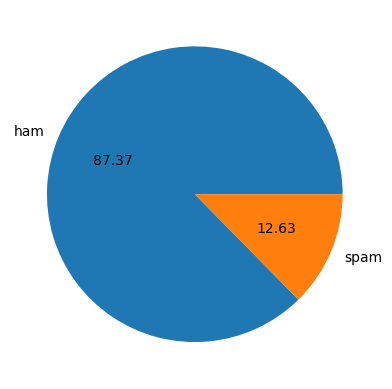

In [29]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [30]:
# Data is imbalanced

In [31]:
import nltk

In [32]:
!pip install nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vivekkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
df['num_characters'] = df['text'].apply(len)

In [35]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

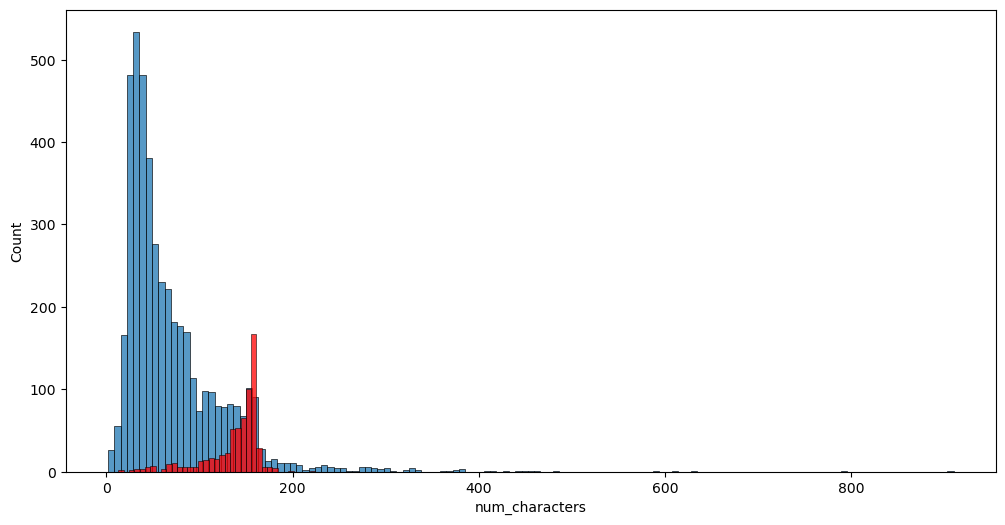

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

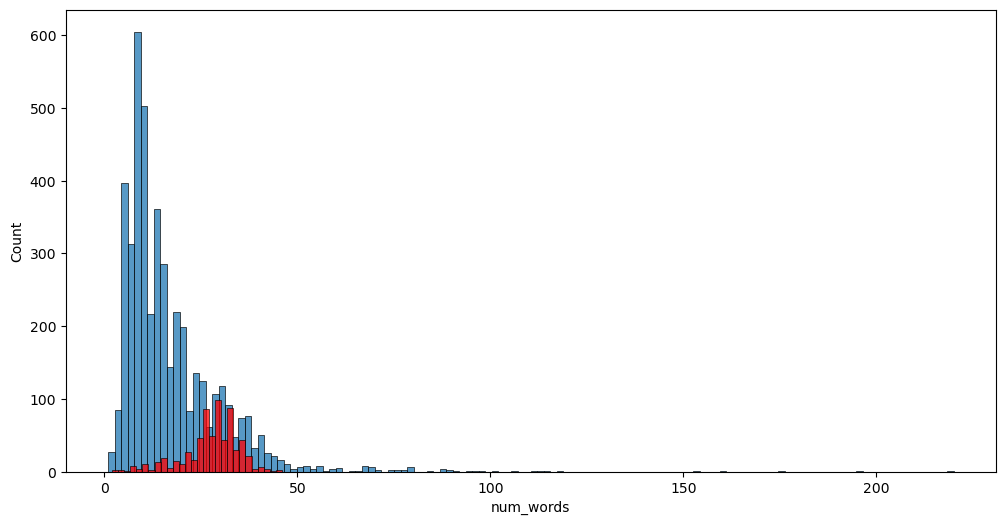

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

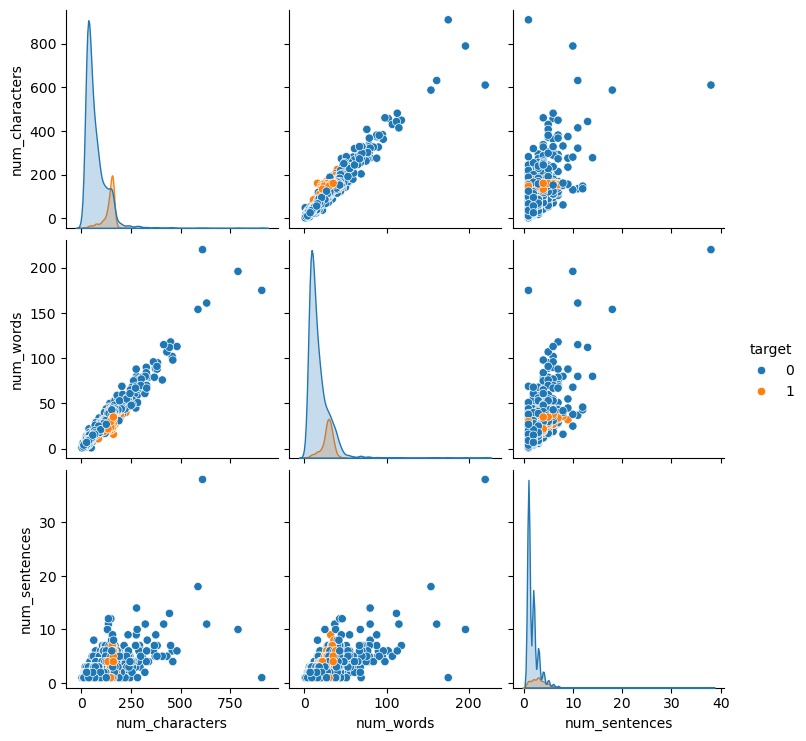

In [46]:
sns.pairplot(df,hue='target')

In [47]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [52]:
# First, define the transform_text function
def transform_text(text):
 
    return text.lower().strip()


df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

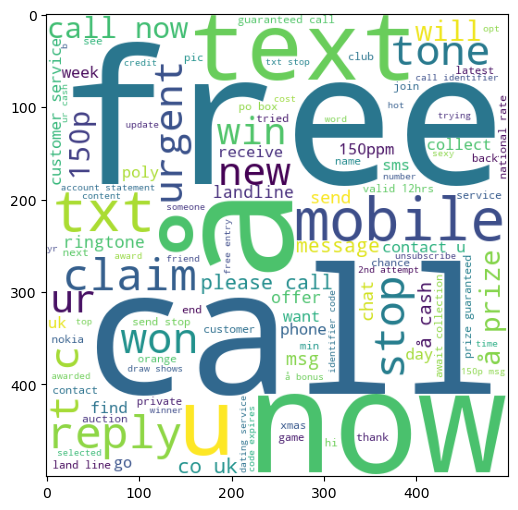

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

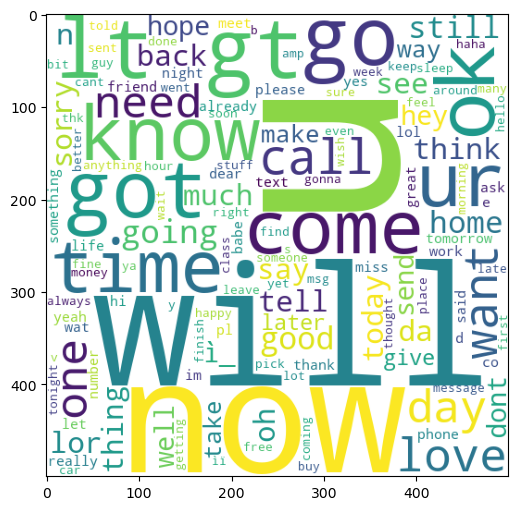

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [61]:
len(spam_corpus)

15464

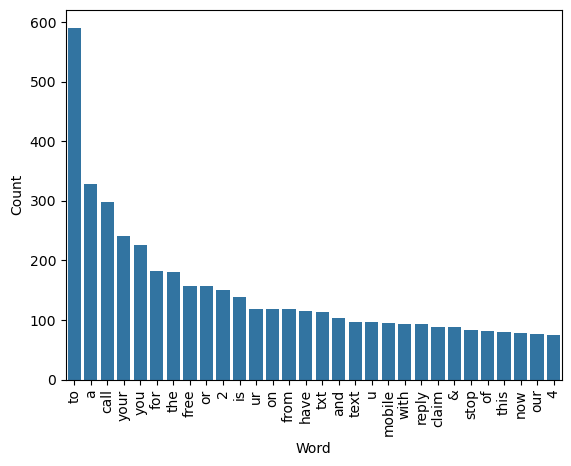

In [63]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the Counter results
most_common_words = Counter(spam_corpus).most_common(30)
df_plot = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the barplot with named parameters
sns.barplot(x='Word', y='Count', data=df_plot)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

63832

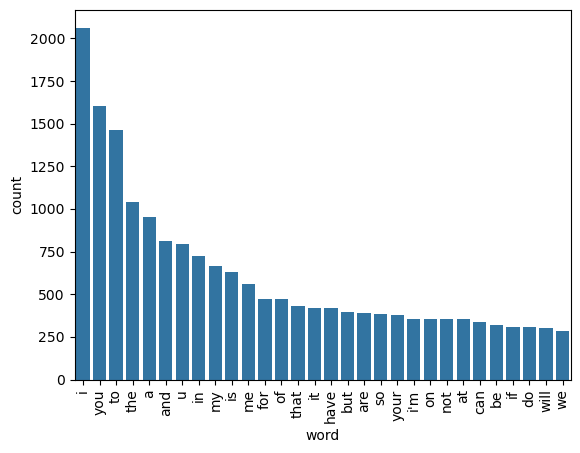

In [68]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the Counter results
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Use named parameters x and y in the barplot function
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [69]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah i don't think he goes to usf, he lives aro..."


## 4. Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [73]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [74]:
X.shape

(5169, 3000)

In [75]:
y = df['target'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8965183752417795
[[809  87]
 [ 20 118]]
0.5756097560975609


In [81]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [82]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[893   3]
 [ 13 125]]
0.9765625


In [83]:
# tfidf --> MNB

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [87]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [88]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9836065573770492)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9738878143133463
Precision -  1.0
For  DT
Accuracy -  0.9390715667311412
Precision -  0.8947368421052632
For  LR
Accuracy -  0.960348162475822
Precision -  0.944954128440367
For  RF
Accuracy -  0.9748549323017408
Precision -  1.0
For  AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.9550561797752809
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.896
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.973888,1.000000
5,RF,0.974855,1.000000
0,SVC,0.980658,0.983607
10,xgb,0.980658,0.983607
8,ETC,0.978723,0.983333
6,AdaBoost,0.944874,0.955056
4,LR,0.960348,0.944954
9,GBDT,0.951644,0.931373
7,BgC,0.962282,0.896000


In [92]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [93]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.973888
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.980658
4,xgb,Accuracy,0.980658
5,ETC,Accuracy,0.978723
6,AdaBoost,Accuracy,0.944874
7,LR,Accuracy,0.960348
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.962282


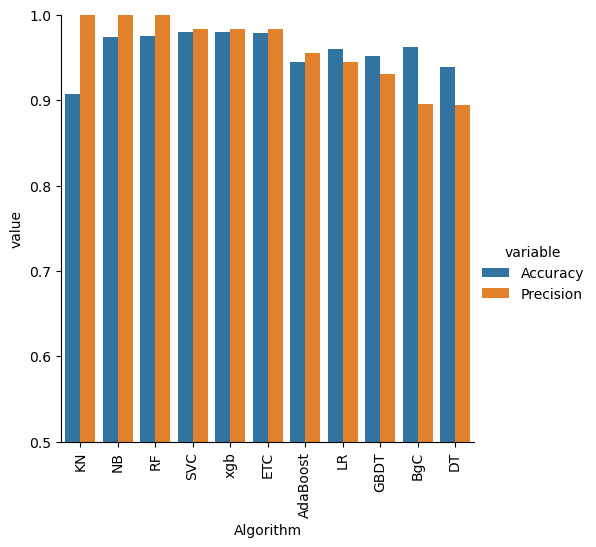

In [94]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [98]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [99]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [100]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [101]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
2,RF,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
3,SVC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
4,xgb,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
5,ETC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
6,AdaBoost,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056
7,LR,0.960348,0.944954,0.960348,0.944954,0.960348,0.944954,0.960348,0.944954
8,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
9,BgC,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000,0.962282,0.896000


In [102]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [103]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [104]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [105]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 1.0


In [106]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [109]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9699248120300752


In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [111]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset with correct encoding
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

# 2. Map labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# 4. Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# 5. Fit the vectorizer and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 6. Train the model (Naive Bayes here, but you can use LogisticRegression, etc.)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 7. Evaluate (optional)
y_pred = model.predict(X_test_tfidf)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# 8. Save fitted vectorizer & trained model
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

print("🎉 Model and Vectorizer saved successfully!")


✅ Accuracy: 0.9668161434977578
🎉 Model and Vectorizer saved successfully!
